#MTase classification
In this notebook we will focus on the pipeline for MTase classification.

Pipeline involves 3 steps:

0. Installing required packages
1.  HMMer search
2.  Region detection
3.  Classification




##0. Installing required packages

In [ ]:
!git clone https://github.com/MVolobueva/MTase-classification.git
!sudo apt-get -y install hmmer
!git clone https://github.com/isrusin/etsv
!python3 -m pip install -e etsv

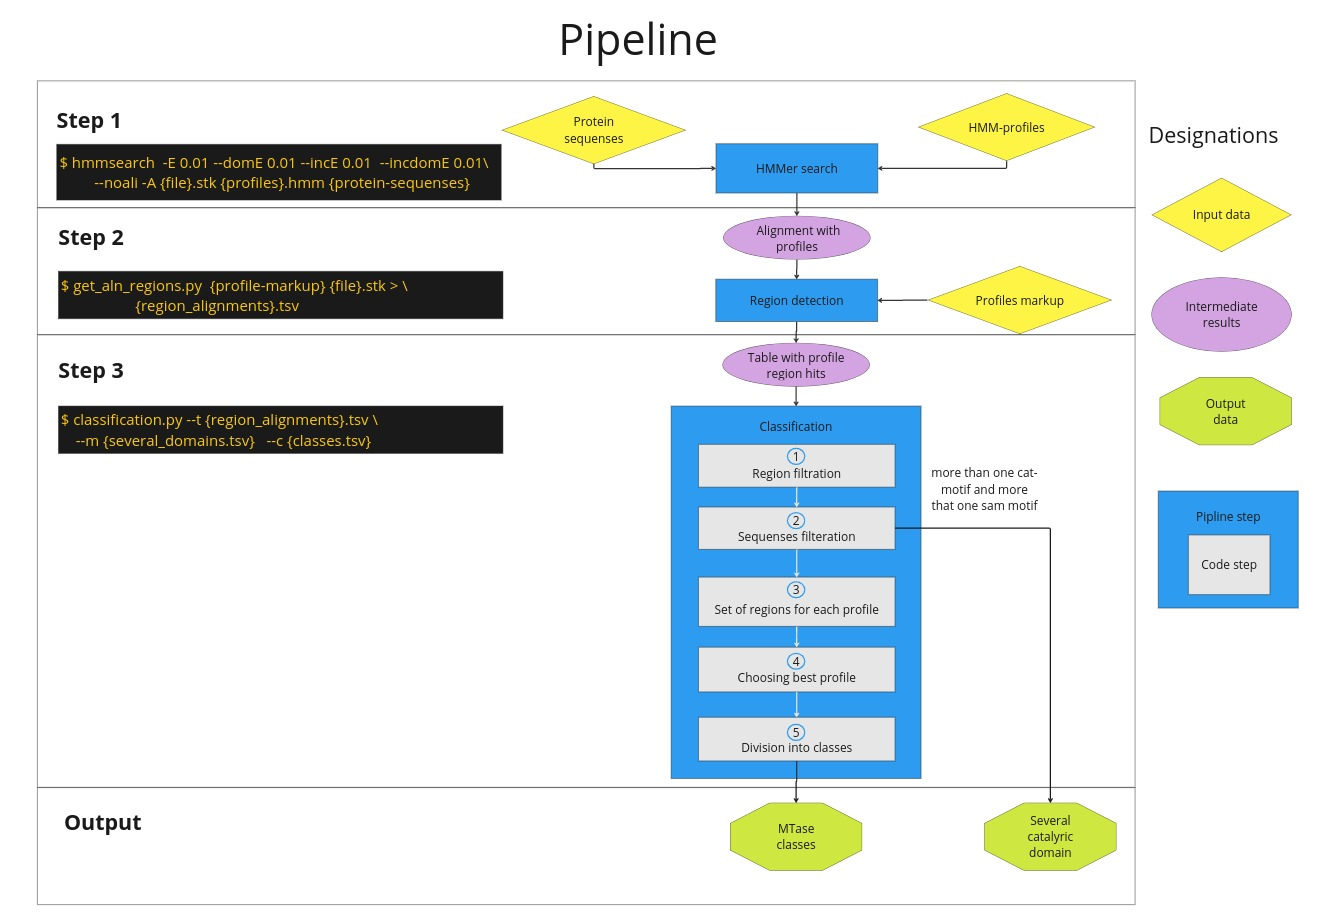

In [ ]:
from IPython.display import Image
Image('/content/MTase-classification/Pipeline.jpg')

## 1.HMMer search


In [ ]:
!hmmsearch --cpu 3 -E 0.01 --domE 0.01 --incE 0.01 --incdomE 0.01 \
        -o /dev/null --noali -A file.stk\
        /content/MTase-classification/HMM_profiles/selected_profiles.hmm /content/MTase-classification/Sample_MTases/MTase_sequences.fasta

## 2. Region detection

In [ ]:
!./MTase-classification/Scripts/get_aln_regions.py \
  /content/MTase-classification/profile-markup/All_profile_region.csv \
  /content/file.stk > region_alignments.tsv

## 3. Classification

In [ ]:
!python ./MTase-classification/Scripts/classification.py \
  --t /content/region_alignments.tsv\
  --m several_cat_domains.tsv\
  --c class.tsv